In [5]:
%pylab inline
from sklearn.cluster import AgglomerativeClustering

Populating the interactive namespace from numpy and matplotlib


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats

#strdata = pd.read_csv("/storage/mgymrek/ssc-imputation/pilot-haplotypes/atxn7_haplotypes.tab", sep="\t")
#strdata = pd.read_csv("/storage/mgymrek/ssc-imputation/pilot-haplotypes/dmpk_haplotypes.tab", sep="\t")
strdata = pd.read_csv("/storage/mgymrek/ssc-imputation/pilot-haplotypes/atxn7_haplotypes_fm.tab", sep="\t")
snppos = [int(line.strip()) for line in open("/storage/mgymrek/ssc-imputation/pilot-haplotypes/atxn7_snppos.txt", "r").readlines()]

In [2]:
#strdata = strdata[strdata["STRallele"].apply(str)!="None"]
strdata = strdata.sort("STRallele")
strdata.head()

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,sample-hap,STRallele,SNPhaplotype
86,SSC07130-hap1,29,0111111111111110111111111111111111111111111111...
300,SSC12236-hap1,29,0111111111111110111111111111111111111111111111...
55,SSC07280-hap2,29,1111111111111111111111111111111111111111111111...
159,SSC02653-hap2,32,1111111111111111111111111111111111111111111111...
167,SSC05182-hap2,32,1111111111111111111111111111111111111111111111...


In [27]:
# Get SNP-STR LD
ld = {}
for i in range(len(snppos)):
    # Get list of SNP and STR alleles
    snp_alleles = strdata[strdata["STRallele"].apply(str)!="None"].apply(lambda x: int(x["SNPhaplotype"][i]), 1)
    str_alleles = strdata[strdata["STRallele"].apply(str)!="None"]["STRallele"].apply(int)
    r2 = scipy.stats.pearsonr(snp_alleles, str_alleles)[0]**2
    ld[snppos[i]] = r2

/usr/lib64/python3.4/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [37]:
ld

{63792668: 0.11175813264560444,
 63792752: nan,
 63792917: 0.0029105045784874996,
 63793425: 0.0024406948508810186,
 63793458: 0.00098888772165516979,
 63793509: 0.0024406948508810186,
 63793559: 0.0014488974757536019,
 63793563: nan,
 63794102: 0.0014488974757536019,
 63794261: 0.013462380813499401,
 63794493: 0.0029105045784874996,
 63794548: 0.26051707541778751,
 63794592: 0.051758075981155158,
 63794976: nan,
 63795071: 0.00098888772165516979,
 63795224: 0.11175813264560444,
 63795517: 0.04040735048504767,
 63795583: nan,
 63795616: 0.00098888772165516979,
 63795696: 0.0024406948508810186,
 63796305: 0.00098888772165516979,
 63796776: 0.0024406948508810186,
 63796872: 0.0024406948508810186,
 63797023: 0.00096343217797934899,
 63797069: 0.0024406948508810186,
 63797231: 0.0024406948508810186,
 63797257: 0.0024406948508810186,
 63797300: nan,
 63797343: 0.001214856794869758,
 63797344: 0.013462380813499401,
 63797376: nan,
 63797538: 0.0024406948508810186,
 63798076: 0.00872984301981

In [32]:
# Load snp data
gwas = pd.read_csv("/storage/mgymrek/atxn7/atxn7_snps.tab", sep="\t")

gwas.head()

,indexSNP,CHR,indexSNP_POS,credibleSNP,crediblePval,credibleProb,credibleCumProb
19676,rs832187,3,63833050,chr3_63823014_I,1.363000e-07,0.026386,0.801954
19677,rs832187,3,63833050,chr3_63833387_D,1.383000e-07,0.026017,0.827971
19678,rs832187,3,63833050,chr3_63879498_I,1.516000e-06,0.002584,0.986021
19679,rs832187,3,63833050,chr3_64002247_D,5.390000e-07,0.006994,0.932278
19680,rs832187,3,63833050,rs1005811,2.073000e-06,0.001913,0.990263


In [3]:
def ClusterRows(hapmatrix, nclusters=6):
    c = AgglomerativeClustering(n_clusters=min([hapmatrix.shape[0], nclusters]))
    labels = c.fit_predict(hapmatrix)
    idx = sorted([(labels[i], i) for i in range(hapmatrix.shape[0])])
    neworder = [item[1] for item in idx]
    return hapmatrix[neworder,:], neworder, [item[0] for item in idx]

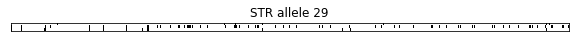

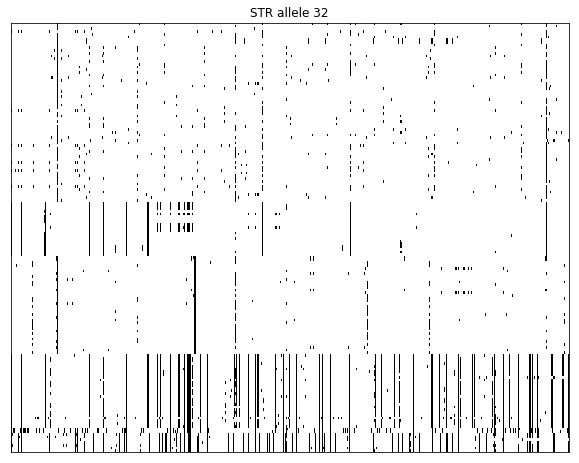

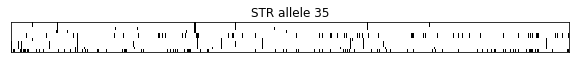

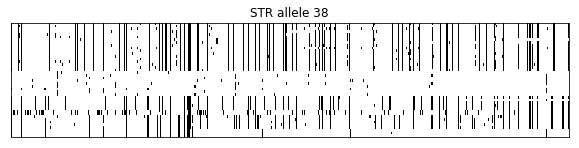

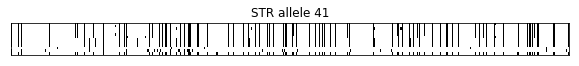

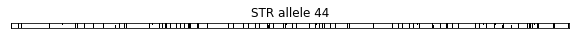

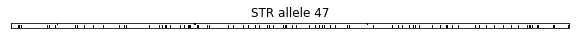

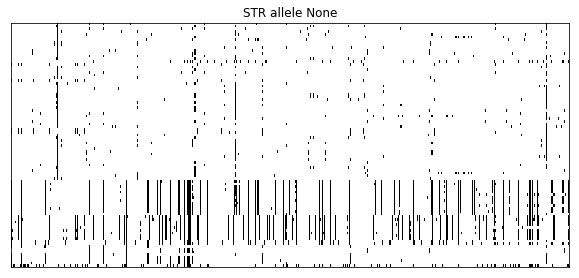

In [6]:
# SNP haplotypes per STR allele
for allele in sorted(list(set(strdata["STRallele"].values))):
    d = strdata[strdata["STRallele"]==allele]
    if d.shape[0] <= 1: continue
    hapmatrix = np.zeros((d.shape[0], len(d.SNPhaplotype.values[0])))
    for i in range(d.shape[0]):
        hapmatrix[i,:] = [int(item) for item in list(d.SNPhaplotype.values[i])]
    # Cluster rows
    hapmatrix_cl = ClusterRows(hapmatrix)[0]
    fig = plt.figure()
    fig.set_size_inches((10, d.shape[0]*0.05))
    ax = fig.add_subplot(111)
    ax.imshow(1-hapmatrix_cl, cmap='Greys', aspect="auto", extent=(0, hapmatrix_cl.shape[1], 0, hapmatrix_cl.shape[0]))
    ax.set_yticks([]);
    ax.set_yticklabels([]);
    ax.set_xticks([]);
    ax.set_xticklabels([]);
    ax.set_title("STR allele %s"%allele)

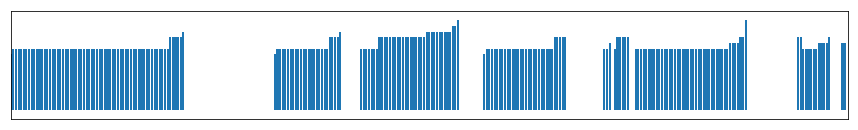

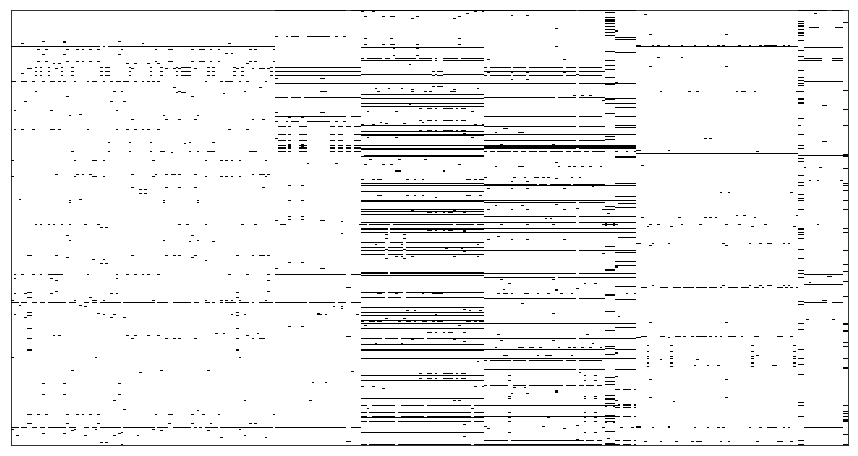

In [10]:
NCLUST=10
# all SNP haplotypes, annotate STR allele
d = strdata
hapmatrix = np.zeros((d.shape[0], len(d.SNPhaplotype.values[0])))
for i in range(d.shape[0]):
    hapmatrix[i,:] = [int(item) for item in list(d.SNPhaplotype.values[i])]
hapmatrix_cl, neworder, clusterids = ClusterRows(hapmatrix, nclusters=NCLUST)
def GetInt(x):
    try:
        return int(x)
    except: return 0 # "None" in allele column
stralleles = [GetInt(x) for x in np.array(d["STRallele"])[neworder]]

# To the top, plot str allele sizes
fig = plt.figure()
fig.set_size_inches((15, 2))
ax = fig.add_subplot(111)
ax.bar(range(len(stralleles)), stralleles)
ax.set_yticks([]);
ax.set_yticklabels([]);
ax.set_xticks([]);
ax.set_xticklabels([]);
ax.set_xlim(left=0, right=len(stralleles))
ax.set_ylim(bottom=min(stralleles)-5, top=max(stralleles)+5)

# Now print snp haplotypes (transpose)
fig = plt.figure()
fig.set_size_inches((15, 8))
ax = fig.add_subplot(111)
ax.imshow((1-hapmatrix_cl).transpose(), cmap='Greys', aspect="auto", extent=(0, hapmatrix_cl.shape[1], 0, hapmatrix_cl.shape[0]))
ax.set_yticks([]);
ax.set_yticklabels([]);
ax.set_xticks([]);
ax.set_xticklabels([]);